<a href="https://colab.research.google.com/github/zrsteff/DSC502-Group-1-Project/blob/main/DSC502_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/DSC502ProjectData'

CTRPv2.0._COLUMNS.xlsx	      v20.data.per_cpd_pre_qc.txt
CTRPv2.0._INFORMER_SET.xlsx   v20.data.per_cpd_well.txt
CTRPv2.0._README.docx	      v20.meta.media_comp.txt
MANIFEST.txt		      v20.meta.per_assay_plate.txt
v20._COLUMNS.txt	      v20.meta.per_cell_line.txt
v20.data.curves_post_qc.txt   v20.meta.per_compound.txt
v20.data.per_cpd_avg.txt      v20.meta.per_experiment.txt
v20.data.per_cpd_post_qc.txt  v20._README.txt


In [ ]:
file_path = '/content/drive/My Drive/DSC502ProjectData/v20.data.per_cpd_post_qc.txt'


In [ ]:
import pandas as pd
df = pd.read_csv(file_path, sep='\t')
display(df.head())

,experiment_id,cpd_pv_errorbar,cpd_pred_pv,cpd_avg_pv,cpd_conc_umol,master_cpd_id
0,1,0.000058,1.0,0.9303,0.00030,1788
1,1,0.000058,1.0,0.8337,0.00061,1788
2,1,0.000058,1.0,1.0460,0.00120,1788
3,1,0.000058,1.0,1.0910,0.00240,1788
4,1,0.000058,1.0,1.0190,0.00490,1788


## Explore Data Types and Summary Statistics

In [ ]:
print("Data types of all columns:")
df.info()

print("\nDescriptive statistics for all columns:")
display(df.describe())

print("\nDescriptive statistics for 'cpd_avg_pv' and 'cpd_conc_umol':")
display(df[['cpd_avg_pv', 'cpd_conc_umol']].describe())

Data types of all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6171005 entries, 0 to 6171004
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   experiment_id    int64  
 1   cpd_pv_errorbar  float64
 2   cpd_pred_pv      float64
 3   cpd_avg_pv       float64
 4   cpd_conc_umol    float64
 5   master_cpd_id    int64  
dtypes: float64(4), int64(2)
memory usage: 282.5 MB

Descriptive statistics for all columns:


,experiment_id,cpd_pv_errorbar,cpd_pred_pv,cpd_avg_pv,cpd_conc_umol,master_cpd_id
count,6.171005e+06,6.171005e+06,6.171005e+06,6.171005e+06,6.171005e+06,6.171005e+06
mean,4.577973e+02,8.192664e+24,8.462978e-01,8.555860e-01,9.837174e+00,4.557644e+05
std,2.621522e+02,2.815797e+27,2.812886e-01,3.013601e-01,3.253056e+01,2.308714e+05
min,1.000000e+00,0.000000e+00,-9.968000e-02,1.922000e-03,4.000000e-06,1.788000e+03
25%,2.280000e+02,1.488000e-06,8.271000e-01,8.016000e-01,1.600000e-02,3.747470e+05
50%,4.600000e+02,2.684000e-02,9.948000e-01,9.660000e-01,2.600000e-01,5.968680e+05
75%,6.840000e+02,8.242000e-02,1.000000e+00,1.033000e+00,4.200000e+00,6.601760e+05
max,9.070000e+02,1.672000e+30,2.659000e+00,2.881000e+00,6.000000e+02,7.101540e+05



Descriptive statistics for 'cpd_avg_pv' and 'cpd_conc_umol':


,cpd_avg_pv,cpd_conc_umol
count,6.171005e+06,6.171005e+06
mean,8.555860e-01,9.837174e+00
std,3.013601e-01,3.253056e+01
min,1.922000e-03,4.000000e-06
25%,8.016000e-01,1.600000e-02
50%,9.660000e-01,2.600000e-01
75%,1.033000e+00,4.200000e+00
max,2.881000e+00,6.000000e+02


## Visualize Dose-Response Curves

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_cpds = df['master_cpd_id'].unique()

num_compounds_to_plot = 5
sampled_cpd_ids = unique_cpds[:num_compounds_to_plot]

sampled_df = df[df['master_cpd_id'].isin(sampled_cpd_ids)]

print(f"Original DataFrame size: {len(df)} rows")
print(f"Sampled DataFrame size: {len(sampled_df)} rows for {num_compounds_to_plot} compounds.")

Original DataFrame size: 6171005 rows
Sampled DataFrame size: 56080 rows for 5 compounds.


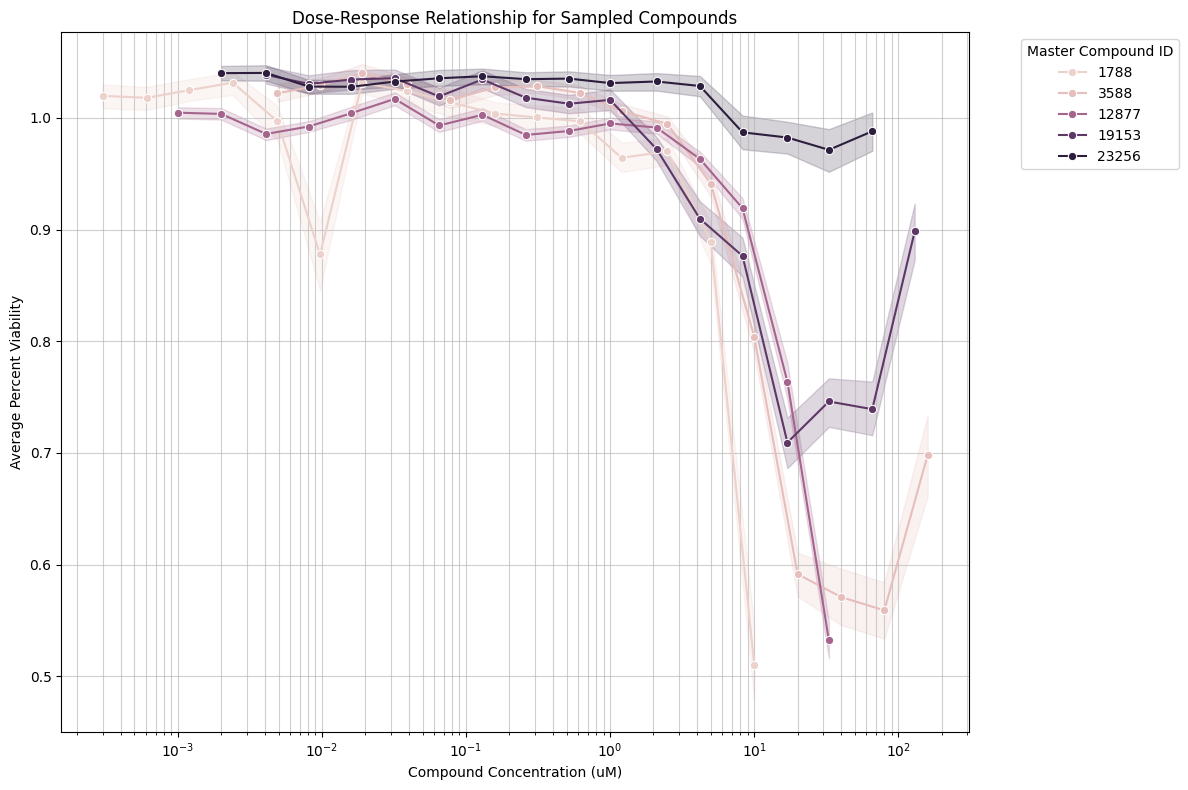

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=sampled_df,
    x='cpd_conc_umol',
    y='cpd_avg_pv',
    hue='master_cpd_id',
    marker='o'
)
plt.xscale('log')
plt.xlabel('Compound Concentration (uM)')
plt.ylabel('Average Percent Viability')
plt.title('Dose-Response Relationship for Sampled Compounds')
plt.legend(title='Master Compound ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
plt.show()


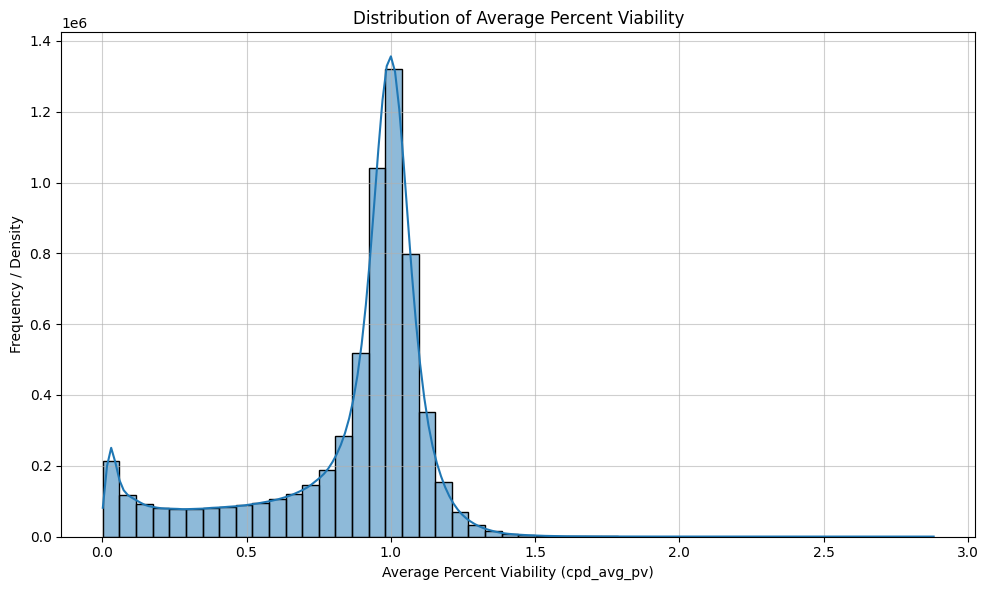

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cpd_avg_pv'], bins=50, kde=True)
plt.xlabel('Average Percent Viability (cpd_avg_pv)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Average Percent Viability')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()